In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import time
import sys

import glob
from tqdm.notebook import tqdm     # jupyter‐friendly progress bar

# find all your matching ROOT files at once
pattern    = "/Users/cmj/GEn_Analysis/Pass2/GEN4b/" \
             "QE_ana_GEN4b_sbs100p_nucleon_np_model2*.root"
file_paths = sorted(glob.glob(pattern))

variables = [
    "ePS", "eSH", "W2", "grinch_track", "grinch_clus_size",
    "dx", "dy", "theta_pq", "trP", "coin_time", "eHCAL", "runnum"
]

# prepare storage
data_parts = { var: [] for var in variables }

# overall timer
t0_total = time.perf_counter()

# wrap the file‐list in tqdm(...) to get a bar in Jupyter
for fp in tqdm(file_paths, desc="Loading files", unit="file"):
    t0 = time.perf_counter()
    with uproot.open(fp) as f:
        tree = f["Tout"]
        for var in variables:
            if var in tree.keys():
                arr = tree[var].array(library="np")
                data_parts[var].append(arr)
            else:
                # you’ll still see these warnings in the notebook output
                print(f"⚠️  {var!r} not in {fp}")
    # print per‐file timing inline
    print(f"  → {fp.split('/')[-1]} in {time.perf_counter() - t0:.2f}s")

print(f"\nAll files loaded in {time.perf_counter() - t0_total:.2f}s")

# finally concatenate each branch
data = { var: np.concatenate(parts) for var, parts in data_parts.items() }

print(f"Combined entries in ePS: {len(data['ePS'])}")

Loading files:   0%|          | 0/1 [00:00<?, ?file/s]

  → QE_ana_GEN4b_sbs100p_nucleon_np_model2LOOSE.root in 0.74s

All files loaded in 0.77s
Combined entries in ePS: 1450732


In [2]:
if __name__ == '__main__':
    # Path to your ROOT file
    file_path = "/Users/cmj/GEn_Analysis/Pass2/GEN4b/SIM_GEN4b_sbs100p_nucleon_np_model2.root" # Load SIM Root File Here

    # Start the timer
    start_time = time.time()

    # Open the ROOT file
    print("Opening ROOT file...")
    file = uproot.open(file_path)

    # Access the TTree
    print("Accessing TTree...")
    tree = file["Tout"]  # Replace "Tout" with the name of the TTree if different

    # Specify the variables you want to load
    variables_to_load_sim = ["dx","dy","grinch_clus_size","eHCAL","vx","vy","vz","eSH","ePS","trP","W2","weight","fnucl"]  # Add or remove variables as needed

    # Initialize an empty dictionary to store the loaded data
    sim = {}

    # Load each variable separately and update progress
    print("Converting selected TTree branches to NumPy arrays...")
    total_variables = len(variables_to_load_sim)
    for index, variable in enumerate(variables_to_load_sim):
        sim[variable] = tree[variable].array(library="np")
        
        # Calculate the percentage done
        percentage_done = int(((index + 1) / total_variables) * 100)
        
        # Print the percentage done on the same line
        sys.stdout.write(f"\r{percentage_done}% complete")
        sys.stdout.flush()

    # Print a new line after the final percentage output
    print()

    # Print the number of entries loaded for one of the variables (e.g., 'W2')
    print(f"Data loaded: {len(sim['ePS'])} entries found")

    # End the timer and print the elapsed time
    elapsed_time = time.time() - start_time
    print(f"Script completed successfully in {elapsed_time:.2f} seconds.")

Opening ROOT file...
Accessing TTree...
Converting selected TTree branches to NumPy arrays...
100% complete
Data loaded: 889752 entries found
Script completed successfully in 0.69 seconds.


In [3]:
#PSe_sim=data4["ps_e"]
PSe_qe=data["ePS"]
PSe_sim=sim["ePS"]
SHe_sim=sim["eSH"]
SHe_qe=data["eSH"]
#SHe_qe_sim=data_qe_sim["eSH"]
W2_qe=data["W2"]
#W2_sim=data4["W2"]
W2_sim=sim["W2"]
GR_Track=data["grinch_track"]
GR_Clussize_d=data["grinch_clus_size"]
GR_Clussize_s=sim["grinch_clus_size"]
trP_qe=data["trP"]
trp_sim=sim["trP"]
#EP_sim=data4["mc_ep"]
#np_sim=data4["bb_p"]
#BB_track_sim=data4["bb_ntr"]
#thetapq_qe=data_qe["theta_pq"]
#thetapq_qe_sim=data_qe_sim["theta_pq"]
eHCAL_qe=data["eHCAL"]
eHCAL_sim=sim["eHCAL"]
cointime=data["coin_time"]
#runnum=data_qe["runnum"]
Etot_qe=PSe_qe+SHe_qe
eop=Etot_qe/trP_qe
eop_sim=(PSe_sim+SHe_sim)/trp_sim
dx_qe=data["dx"]
dy_qe=data["dy"]
dx_sim=sim["dx"]
dy_sim=sim["dy"]
weight=sim["weight"]
fnucl=sim["fnucl"]

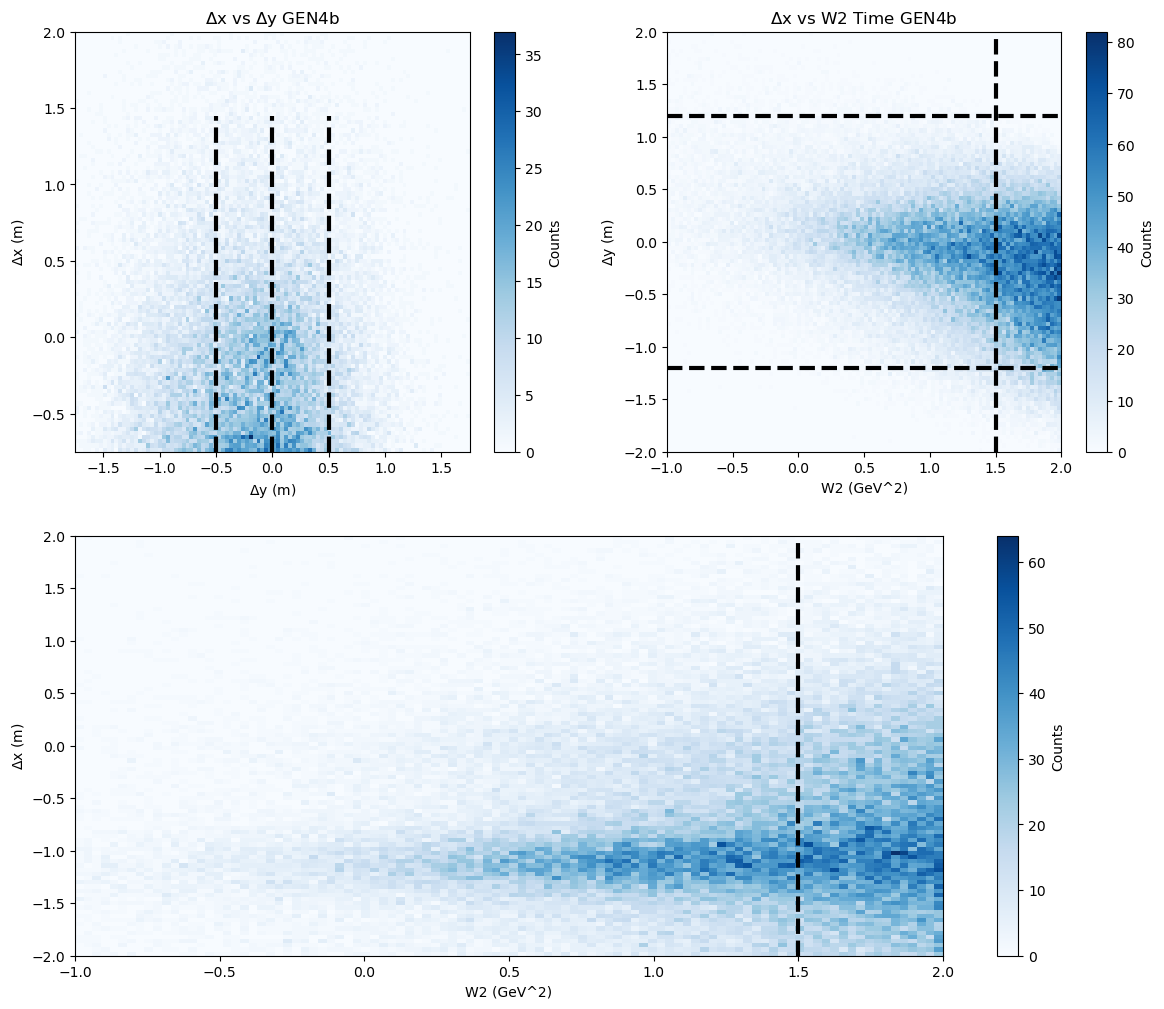

In [53]:
plt.figure(figsize=(14,12))
plt.subplot(2,2,1)
plt.hist2d(dy_qe[(W2_qe<2)&(W2_qe>-.5)&(abs(eop-1)<.2)&(PSe_qe>.2)&(eHCAL_qe>.095)&(abs(cointime-185.5)<3)], 
        dx_qe[(W2_qe<2)&(W2_qe>-.5)&(abs(eop-1)<.2)&(PSe_qe>.2)&(eHCAL_qe>.095)&(abs(cointime-185.5)<3)], 
        range=[[-1.75,1.75],[-.75,2]], bins=100, cmap='Blues')
plt.xlabel("$\\Delta$y (m)")
plt.ylabel("$\\Delta$x (m)")
plt.colorbar(label='Counts')
plt.axvline(x=-.5, color='black', ls='--' , lw=3, ymax=.8)
plt.axvline(x=.5, color='black', ls='--' , lw=3, ymax=.8)
plt.axvline(x=0, color='black', ls='--' , lw=3, ymax=.8)
plt.title("$\\Delta$x vs $\\Delta$y GEN4b")
plt.subplot(2,2,2)
plt.hist2d(W2_qe[(abs(eop-1)<.2)&(PSe_qe>.2)&(eHCAL_qe>.095)&(abs(cointime-185.5)<3)],
           dy_qe[(abs(eop-1)<.2)&(PSe_qe>.2)&(eHCAL_qe>.095)&(abs(cointime-185.5)<3)], 
           range=[[-1,2],[-2,2]], bins=100, cmap='Blues')
plt.xlabel("W2 (GeV^2)")
plt.ylabel("$\\Delta$y (m)")
plt.colorbar(label='Counts')
plt.axhline(y=1.2, color='black', ls='--' , lw=3)
plt.axhline(y=-1.2, color='black', ls='--' , lw=3)
plt.axvline(x=1.5, color='black', ls='--' , lw=3)
plt.title("$\\Delta$x vs W2 Time GEN4b")
plt.subplot(2,1,2)
plt.hist2d(W2_qe[(abs(eop-1)<.2)&(PSe_qe>.2)&(eHCAL_qe>.095)&(abs(cointime-185.5)<3)],
           dx_qe[(abs(eop-1)<.2)&(PSe_qe>.2)&(eHCAL_qe>.095)&(abs(cointime-185.5)<3)], 
           range=[[-1,2],[-2,2]], bins=100, cmap='Blues')
plt.xlabel("W2 (GeV^2)")
plt.ylabel("$\\Delta$x (m)")
plt.axvline(x=1.5, color='black', ls='--' , lw=3)
plt.colorbar(label='Counts')
plt.show()

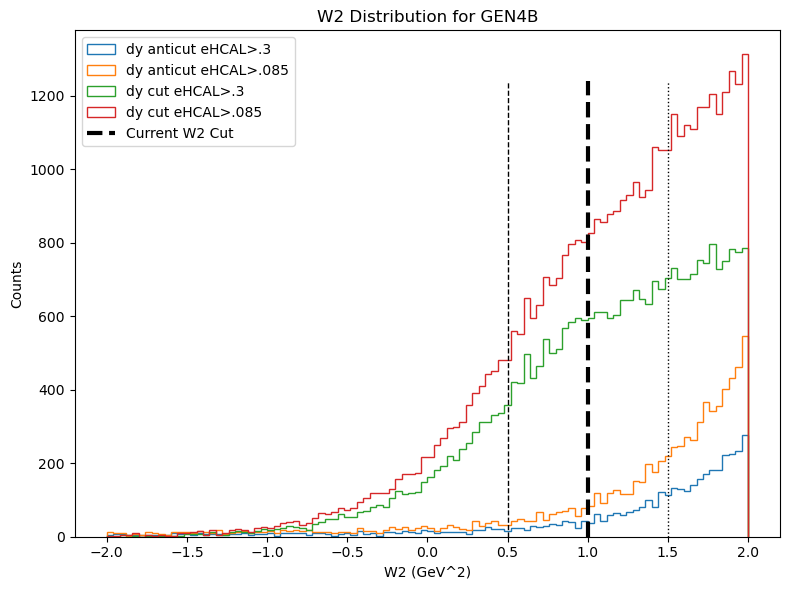

In [28]:
plt.figure(figsize=(8,6))
plt.hist(W2_qe[(eop>.85)&(abs(cointime-185.5)<3) & (eHCAL_qe>0.3) &
             ((dy_qe<-1)|(dy_qe>1.0))&(GR_Track==0)&(GR_Clussize_d>2)],bins=100,histtype='step',range=[-2,2],label='dy anticut eHCAL>.3')
plt.hist(W2_qe[(eop>.85)&(abs(cointime-185.5)<3) & (eHCAL_qe>0.085) &
             ((dy_qe<-1)|(dy_qe>1.0))&(GR_Track==0)&(GR_Clussize_d>2)],bins=100,histtype='step',range=[-2,2],label='dy anticut eHCAL>.085')
plt.hist(W2_qe[(eop>.85)&(abs(cointime-185.5)<3) & (eHCAL_qe>0.3) &
             (GR_Track==0)&(GR_Clussize_d>2)&(abs(dy_qe)<.4)],bins=100,histtype='step',range=[-2,2],label='dy cut eHCAL>.3')
plt.hist(W2_qe[(eop>.85)&(abs(cointime-185.5)<3) & (eHCAL_qe>0.085) &
             (GR_Track==0)&(GR_Clussize_d>2)&(abs(dy_qe)<.4)],bins=100,histtype='step',range=[-2,2],label='dy cut eHCAL>.085')
plt.xlabel("W2 (GeV^2)")
plt.ylabel("Counts")
plt.title("W2 Distribution for GEN4B")
plt.axvline(x=.5, color='black', ls='--' , lw=1, ymax=.9)
plt.axvline(x=1, color='black', ls='--' , lw=3, ymax=.9,label='Current W2 Cut')
plt.axvline(x=1.5, color='black', ls=':' , lw=1, ymax=.9)
plt.legend()
plt.tight_layout()
plt.savefig("Pass2/plots/GEN4b_W2_cut_look.pdf")
plt.savefig("Pass2/plots/GEN4b_W2_cut_look.svg")
plt.savefig("Pass2/plots/GEN4b_W2_cut_look.png")
plt.show()

In [24]:
mask_sim   = (W2_sim>-2)&(W2_sim<1)&(abs(dy_sim)<1)&(eHCAL_sim>0.3)&(eop_sim>.85)
mask_p     = mask_sim & (fnucl==1)
mask_n     = mask_sim & (fnucl==0)
mask_data  = (
    (W2_qe>-2)&(W2_qe<1)&
    (abs(cointime-185.5)<3)&(dy_qe<1)&(dy_qe>-1)&
    (eHCAL_qe>0.3)&(GR_Track==0)&(GR_Clussize_d>2)&
    (eop>.85)
)
mask_bg   = ((W2_qe<1)&(W2_qe>-2)&(eop>.85)&(abs(cointime-185.5)<3) & (eHCAL_qe>0.3) &
             ((dy_qe<-1)|(dy_qe>1.0))&(GR_Track==0)&(GR_Clussize_d>2))
bins = np.linspace(-6,3,101)   # 100 bins from -6 to +3
centers = 0.5*(bins[:-1]+bins[1:])

# build histograms
counts_data, edges = np.histogram(dx_qe[mask_data], bins=bins)
counts_p,    _     = np.histogram(dx_sim[mask_p],   bins=bins)
counts_n,    _     = np.histogram(dx_sim[mask_n],   bins=bins)
bg_counts,   _ = np.histogram(dx_qe[mask_bg],    bins=bins)

# choose your scale factor:
#  • to match total area:
#p_scale = counts_data.sum() / counts_p.sum()
#n_scale = counts_data.sum() / counts_n.sum()

#  • or to match peak heights:
p_scale = counts_data.max() / counts_p.max()
n_scale = counts_data.max() / counts_n.max()

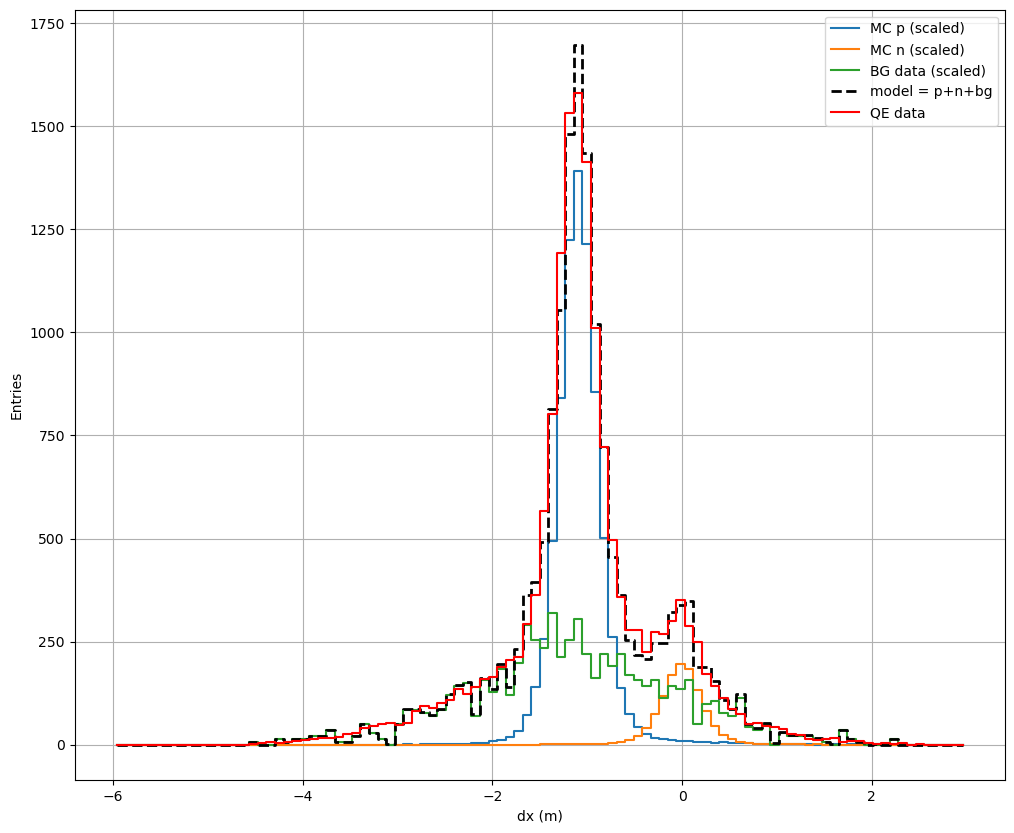

scales → p: 0.076,  n: 0.019,  bg: 7.084


In [25]:
from scipy.optimize import nnls

# 1) build histograms
bins    = np.linspace(-6, 3, 101)
centers = 0.5*(bins[:-1] + bins[1:])

data_counts, _ = np.histogram(dx_qe[mask_data],  bins=bins)
p_counts,    _ = np.histogram(dx_sim[mask_p],    bins=bins)
n_counts,    _ = np.histogram(dx_sim[mask_n],    bins=bins)
bg_counts,   _ = np.histogram(dx_qe[mask_bg],     bins=bins)

# 2) set up the design matrix (nbins × 3)
#    each column is one of the MC/data bg templates
A = np.vstack([p_counts, n_counts, bg_counts]).T

# 3) solve A · [p_scale,n_scale,bg_scale] ≈ data_counts
scales, rnorm = nnls(A, data_counts)
p_scale, n_scale, bg_scale = scales

# 4) build your total model
model_counts = p_scale*p_counts + n_scale*n_counts + bg_scale*bg_counts

# 5) plot everything
plt.figure(figsize=(12,10))
plt.step(centers, p_scale*p_counts,   where='mid', label='MC p (scaled)')
plt.step(centers, n_scale*n_counts,   where='mid', label='MC n (scaled)')
plt.step(centers, bg_scale*bg_counts, where='mid', label='BG data (scaled)')
plt.step(centers, model_counts,       where='mid',
         label='model = p+n+bg', color='k',
         lw=2, linestyle='--')
plt.step(centers, data_counts,        where='mid',
         label='QE data', color='red')
plt.xlabel("dx (m)")
plt.ylabel("Entries")
plt.legend()
plt.grid(True)
plt.show()

print(f"scales → p: {p_scale:.3f},  n: {n_scale:.3f},  bg: {bg_scale:.3f}")

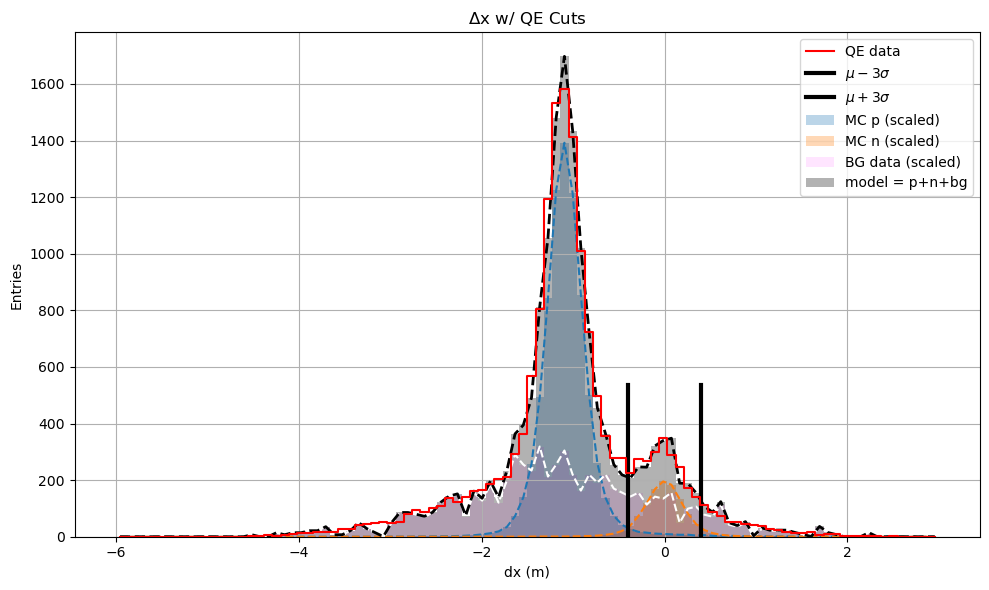

In [26]:
# 1) build histograms
bins    = np.linspace(-6, 3, 101)
centers = 0.5*(bins[:-1] + bins[1:])

data_counts, _ = np.histogram(dx_qe[mask_data],  bins=bins)
p_counts,    _ = np.histogram(dx_sim[mask_p],    bins=bins)
n_counts,    _ = np.histogram(dx_sim[mask_n],    bins=bins)
bg_counts,   _ = np.histogram(dx_qe[mask_bg],    bins=bins)

# 2) solve for optimal scales via non‐negative least squares
A = np.vstack([p_counts, n_counts, bg_counts]).T
scales, _ = nnls(A, data_counts)
p_scale, n_scale, bg_scale = scales

# 3) build your total model
model_counts = p_scale*p_counts + n_scale*n_counts + bg_scale*bg_counts

# 4) plot: bars + dashed outlines + data step
width = bins[1] - bins[0]

plt.figure(figsize=(10,6))

# MC-p
plt.bar  (centers, p_scale*p_counts, width, align='center',
          alpha=0.3, color='C0', label='MC p (scaled)',   zorder=1)
plt.plot (centers, p_scale*p_counts, '--', color='C0',                    zorder=2)

# MC-n
plt.bar  (centers, n_scale*n_counts, width, align='center',
          alpha=0.3, color='C1', label='MC n (scaled)',   zorder=1)
plt.plot (centers, n_scale*n_counts, '--', color='C1',                    zorder=2)

# Data-driven BG
plt.bar  (centers, bg_scale*bg_counts, width, align='center',
          alpha=0.1, color='magenta', label='BG data (scaled)', zorder=1)
plt.plot (centers, bg_scale*bg_counts, '--', color='white',                  zorder=2)

# Total model = p+n+bg
plt.bar  (centers, model_counts,       width, align='center',
          alpha=0.3, color='k',  label='model = p+n+bg', zorder=1)
plt.plot (centers, model_counts,       '--', color='k', lw=2,            zorder=2)

# Finally overlay the real data
plt.step (centers, data_counts, where='mid', color='r',
          label='QE data', zorder=3)
plt.axvline(-.4, color='black', linewidth=3,ymax=.3, label=r'$\mu - 3\sigma$')
plt.axvline(.4, color='black', linewidth=3,ymax=.3, label=r'$\mu + 3\sigma$')
plt.xlabel("dx (m)")
plt.ylabel("Entries")
plt.legend()
plt.grid(True)
plt.title("$\\Delta$x w/ QE Cuts")
plt.tight_layout()
plt.savefig("Pass2/plots/GEN4b_dx_plot.pdf")
plt.savefig("Pass2/plots/GEN4b_dx_plot.svg")
plt.savefig("Pass2/plots/GEN4b_dx_plot.png")
plt.show()

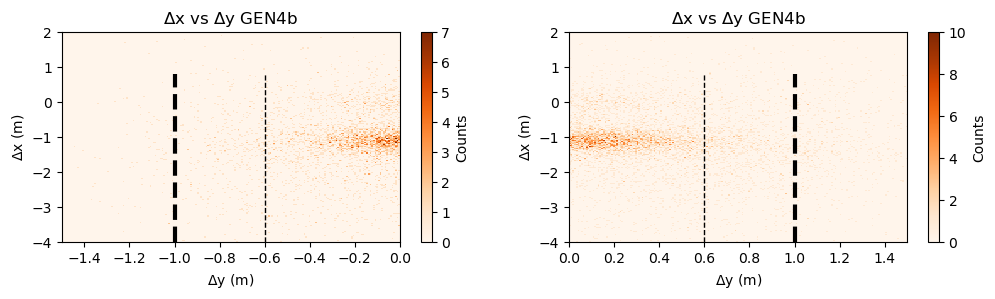

In [23]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.hist2d(dy_qe[(W2_qe>-2)&(W2_qe<.5)&
    (abs(cointime-185.5)<3)&
    (eHCAL_qe>0.2)&(GR_Track==0)&(GR_Clussize_d>2)&
    (eop>.85)], dx_qe[(W2_qe>-2)&(W2_qe<.5)&
    (abs(cointime-185.5)<3)&
    (eHCAL_qe>0.2)&(GR_Track==0)&(GR_Clussize_d>2)&
    (eop>.85)],range=[[-1.5,0],[-4,2]],cmap='Oranges',bins=200)
plt.xlabel("$\\Delta$y (m)")
plt.ylabel("$\\Delta$x (m)")
plt.axvline(x=-1, color='black', ls='--' , lw=3, ymax=.8)
plt.axvline(x=1, color='black', ls='--' , lw=3, ymax=.8)
plt.axvline(x=-.6, color='black', ls='--' , lw=1, ymax=.8)
plt.axvline(x=.6, color='black', ls='--' , lw=1, ymax=.8)
plt.colorbar(label='Counts')
plt.title("$\\Delta$x vs $\\Delta$y GEN4b")
plt.subplot(2,2,2)
plt.hist2d(dy_qe[(W2_qe>-2)&(W2_qe<.5)&
    (abs(cointime-185.5)<3)&
    (eHCAL_qe>0.2)&(GR_Track==0)&(GR_Clussize_d>2)&
    (eop>.85)], dx_qe[(W2_qe>-2)&(W2_qe<.5)&
    (abs(cointime-185.5)<3)&
    (eHCAL_qe>0.2)&(GR_Track==0)&(GR_Clussize_d>2)&
    (eop>.85)],range=[[0,1.5],[-4,2]],cmap='Oranges',bins=200)
plt.xlabel("$\\Delta$y (m)")
plt.ylabel("$\\Delta$x (m)")
plt.axvline(x=-1, color='black', ls='--' , lw=3, ymax=.8)
plt.axvline(x=1, color='black', ls='--' , lw=3, ymax=.8)
plt.axvline(x=-.6, color='black', ls='--' , lw=1, ymax=.8)
plt.axvline(x=.6, color='black', ls='--' , lw=1, ymax=.8)
plt.colorbar(label='Counts')
plt.title("$\\Delta$x vs $\\Delta$y GEN4b")
plt.savefig("Pass2/plots/GEN4b_dy_cut_look.pdf")
plt.savefig("Pass2/plots/GEN4b_dy_cut_look.svg")
plt.savefig("Pass2/plots/GEN4b_dy_cut_look.png")
plt.show()

Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations 5, initial cost 4.3294e+04, final cost 2.1326e+04, first-order optimality 7.40e-04.


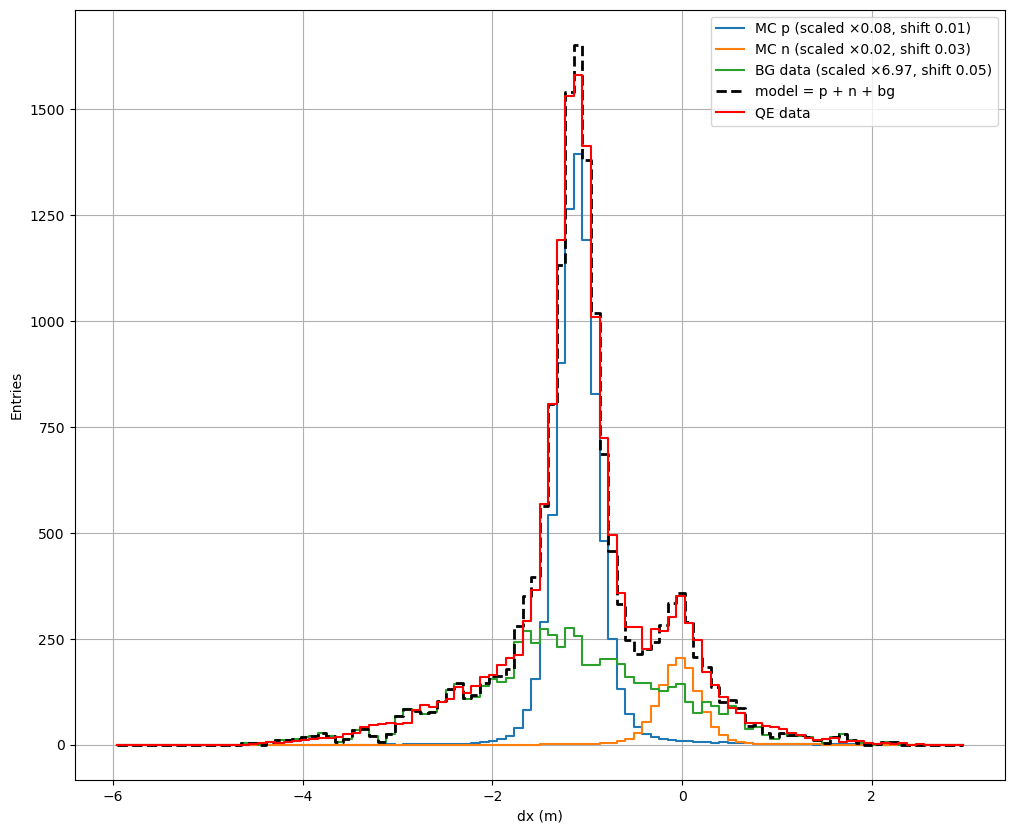

Shifts → Δp = 0.010, Δn = 0.026, Δbg = 0.046
Scales → p = 0.078,  n = 0.020,  bg = 6.966


In [55]:
from scipy.optimize import least_squares, nnls

# --- 1) build histograms ---
bins        = np.linspace(-6, 3, 101)
centers     = 0.5*(bins[:-1] + bins[1:])

data_counts, _ = np.histogram(dx_qe[mask_data], bins=bins)
p_counts,    _ = np.histogram(dx_sim[mask_p],    bins=bins)
n_counts,    _ = np.histogram(dx_sim[mask_n],    bins=bins)
bg_counts,   _ = np.histogram(dx_qe[mask_bg],     bins=bins)

# --- helper: shift + interpolate a template histogram ---
def shift_template(template, shift):
    # shifts x → x - shift so a peak at x0 goes to x0+shift
    return np.interp(centers,
                     centers - shift,
                     template,
                     left=0, right=0)

# --- 2) initial guess for scales via nnls (no shifts) ---
A0 = np.vstack([p_counts, n_counts, bg_counts]).T
sc0, _ = nnls(A0, data_counts)
p0, n0, b0 = sc0

# pack initial guesses: [Δp, Δn, Δbg, p_scale, n_scale, bg_scale]
x0 = [0.0, 0.0, 0.0, p0, n0, b0]

# --- 3) define residuals for least_squares ---
def residuals(params):
    dp, dn, db, p_s, n_s, b_s = params

    tp = shift_template(p_counts, dp)
    tn = shift_template(n_counts, dn)
    tb = shift_template(bg_counts,   db)

    model = p_s*tp + n_s*tn + b_s*tb
    return data_counts - model

# we require scales ≥ 0 but allow any shift
lower = [-np.inf, -np.inf, -np.inf,  0, 0, 0]
upper = [ np.inf,  np.inf,  np.inf, np.inf, np.inf, np.inf]

# --- 4) run the fit ---
res = least_squares(residuals,
                    x0,
                    bounds=(lower, upper),
                    verbose=1)

dp, dn, db, p_s, n_s, b_s = res.x

# --- 5) rebuild final model with fitted shifts & scales ---
tp = shift_template(p_counts, dp)
tn = shift_template(n_counts, dn)
tb = shift_template(bg_counts,   db)
model = p_s*tp + n_s*tn + b_s*tb

# --- 6) plot everything ---
plt.figure(figsize=(12,10))
plt.step(centers, p_s*tp,   where='mid',
         label=f'MC p (scaled ×{p_s:.2f}, shift {dp:.2f})')
plt.step(centers, n_s*tn,   where='mid',
         label=f'MC n (scaled ×{n_s:.2f}, shift {dn:.2f})')
plt.step(centers, b_s*tb,   where='mid',
         label=f'BG data (scaled ×{b_s:.2f}, shift {db:.2f})')
plt.step(centers, model,    where='mid',
         linestyle='--', color='k', lw=2,
         label='model = p + n + bg')
plt.step(centers, data_counts,
         where='mid', color='r', label='QE data')
plt.xlabel("dx (m)")
plt.ylabel("Entries")
plt.legend(loc='best')
plt.grid(True)
plt.show()

# --- 7) report final parameters ---
print(f"Shifts → Δp = {dp:.3f}, Δn = {dn:.3f}, Δbg = {db:.3f}")
print(f"Scales → p = {p_s:.3f},  n = {n_s:.3f},  bg = {b_s:.3f}")

→ Best model: spline  (criterion = 32.0)


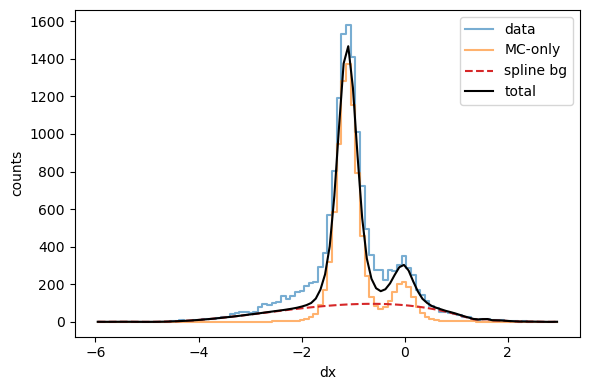

In [127]:
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline

# … assume centers, counts_data, counts_p, counts_n, Δp, Δn, p_s, n_s are defined …

# 1) Build the “residual background” after your p/n subtraction
tp    = shift_template(counts_p, Δp)
tn    = shift_template(counts_n, Δn)
resid = counts_data - (p_s*tp + n_s*tn)

# 2) Side-band only
sb   = (centers < -4) | (centers > +1)
x_sb = centers[sb]
y_sb = resid[sb]
n    = len(y_sb)

# 3) Candidate functions
def poly(x, *a):
    return sum(a[i]*x**i for i in range(len(a)))

def expo(x, A, b, c):
    return A * np.exp(b*x) + c

def powerlaw(x, A, alpha, c):
    # clamp x to tiny positive so no zero**negative
    x_pos = np.clip(x, 1e-8, None)
    return A * x_pos**alpha + c

def gaussian(x, A, mu, sigma, c):
    return A * np.exp(-(x-mu)**2/(2*sigma**2)) + c

def rational(x, a, b, c, d):
    return (a + b*x) / (1 + c*x + d*x**2)

models = {
    'poly1':    (poly,     [np.mean(y_sb), 0]),
    'poly2':    (poly,     [np.mean(y_sb), 0, 0]),
    'poly3':    (poly,     [np.mean(y_sb), 0, 0, 0]),
    'poly4':    (poly,     [np.mean(y_sb), 0, 0, 0, 0]),
    'expo':     (expo,     [np.max(y_sb), -1, np.min(y_sb)]),
    'power':    (powerlaw,[1, 1, 0]),
    'gauss':    (gaussian,[np.max(y_sb),
                          x_sb[np.argmax(y_sb)],
                          np.std(x_sb, ddof=1),
                          0]),
    'rational': (rational,[1, 0, 0, 0]),
}

results = {}
use_bic = False  # or False for AIC

for name, (func, p0) in models.items():
    try:
        popt, _ = curve_fit(func, x_sb, y_sb, p0=p0, maxfev=5000)
        y_fit   = func(x_sb, *popt)
        rss     = np.sum((y_sb - y_fit)**2)
        k       = len(popt)
        if use_bic:
            crit = n*np.log(rss/n) + k*np.log(n)
        else:
            crit = 2*k + n*np.log(rss/n)
        results[name] = (popt, rss, crit)
    except Exception as e:
        print(f"  {name}: fit failed ({e})")

# add a smoothing spline
bs     = UnivariateSpline(x_sb, y_sb, s=n)
y_spl  = bs(x_sb)
rss    = np.sum((y_sb - y_spl)**2)
k_spl  = len(bs.get_knots())
if use_bic:
    crit_spl = n*np.log(rss/n) + k_spl*np.log(n)
else:
    crit_spl = 2*k_spl + n*np.log(rss/n)
results['spline'] = (bs, rss, crit_spl)

# pick best by lowest criterion
best_name, (best_p, best_rss, best_crit) = min(
    results.items(), key=lambda kv: kv[1][2])
print(f"→ Best model: {best_name}  (criterion = {best_crit:.1f})")

# build final bg_fit
if best_name == 'spline':
    # best_p is actually the UnivariateSpline object
    bg_fit = best_p(centers)
else:
    func   = models[best_name][0]
    bg_fit = func(centers, *best_p)

# plot everything
model = p_s*tp + n_s*tn + bg_fit

plt.figure(figsize=(6,4))
plt.step(centers, counts_data,     where='mid', label='data',    color='C0', alpha=0.6)
plt.step(centers, p_s*tp + n_s*tn, where='mid', label='MC-only', color='C1', alpha=0.6)
plt.plot(centers, bg_fit, '--',     label=f'{best_name} bg', color='C3')
plt.plot(centers, model,  '-',      label='total',      color='k')
plt.legend(loc='best')
plt.xlabel("dx"); plt.ylabel("counts")
plt.tight_layout(); plt.show()

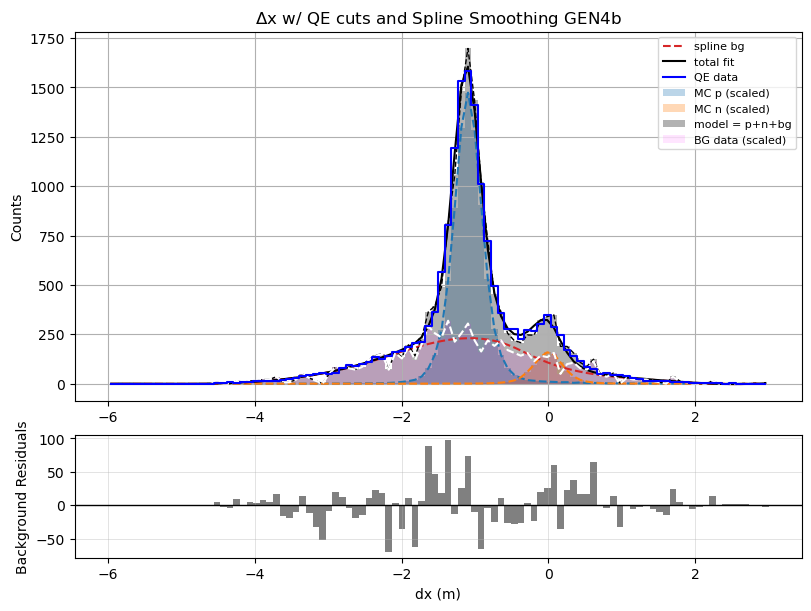

In [128]:
from scipy.interpolate import UnivariateSpline, LSQUnivariateSpline

# --- 1) Build the residual under your two peaks:
tp    = shift_template(counts_p, Δp)
tn    = shift_template(counts_n, Δn)
resid = counts_data - (p_s*tp + n_s*tn)

# --- 2) Define the background‐only mask:
mask_bg = (
    (centers < -2.2)                       # far left
  | ((centers > -0.7) & (centers < -0.1))  # valley
  | (centers > +0.6)                       # far right
)
x_bg = centers[mask_bg]
y_bg = resid[mask_bg]

# --- 3) Fit a smoothed spline through those BG points:
s_val = len(x_bg) * np.var(y_bg) * 0.02   # tweak 0.01–0.2 to taste
bs    = UnivariateSpline(x_bg, y_bg, s=s_val)
bg_fit = bs(centers)

# --- 4) rebuild your total model
model = p_s*tp + n_s*tn + bg_fit

# --- 5) compute BG residual = (data-driven BG) – (spline BG)
resid_bg = bg_scale*bg_counts - bg_fit

# --- 6) two‐panel plot with constrained_layout ---
fig = plt.figure(figsize=(8,6), constrained_layout=True)
gs  = fig.add_gridspec(2, 1, height_ratios=[3, 1])

# Top panel: main histograms & fits
ax0 = fig.add_subplot(gs[0])
ax0.bar  (centers, p_scale*p_counts,   width, align='center',
          alpha=0.3, color='C0', label='MC p (scaled)')
ax0.plot (centers, p_scale*p_counts,   '--', color='C0')
ax0.bar  (centers, n_scale*n_counts,   width, align='center',
          alpha=0.3, color='C1', label='MC n (scaled)')
ax0.plot (centers, n_scale*n_counts,   '--', color='C1')
ax0.plot (centers, bg_fit,             '--', color='C3', label='spline bg')
ax0.bar  (centers, model_counts,       width, align='center',
          alpha=0.3, color='k',  label='model = p+n+bg')
ax0.plot (centers, model_counts,       '--', color='k', lw=1)
ax0.plot (centers, model,              '-',  color='k', label='total fit')
ax0.bar  (centers, bg_scale*bg_counts, width, align='center',
          alpha=0.1, color='magenta', label='BG data (scaled)')
ax0.plot (centers, bg_scale*bg_counts, '--', color='white')
ax0.step (centers, data_counts,       where='mid', color='blue',
          label='QE data', zorder=3)
ax0.set_ylabel("Counts")
ax0.legend(loc='best', fontsize=8)
plt.title("$\\Delta$x w/ QE cuts and Spline Smoothing GEN4b")
ax0.grid(True)

# Bottom panel: background residuals
ax1 = fig.add_subplot(gs[1], sharex=ax0)
ax1.bar  (centers, resid_bg, width, align='center', color='gray')
ax1.axhline(0, color='k', lw=1)
ax1.set_xlabel("dx (m)")
ax1.set_ylabel("Background Residuals")
ax1.grid(True, lw=0.5, alpha=0.5)

plt.show()

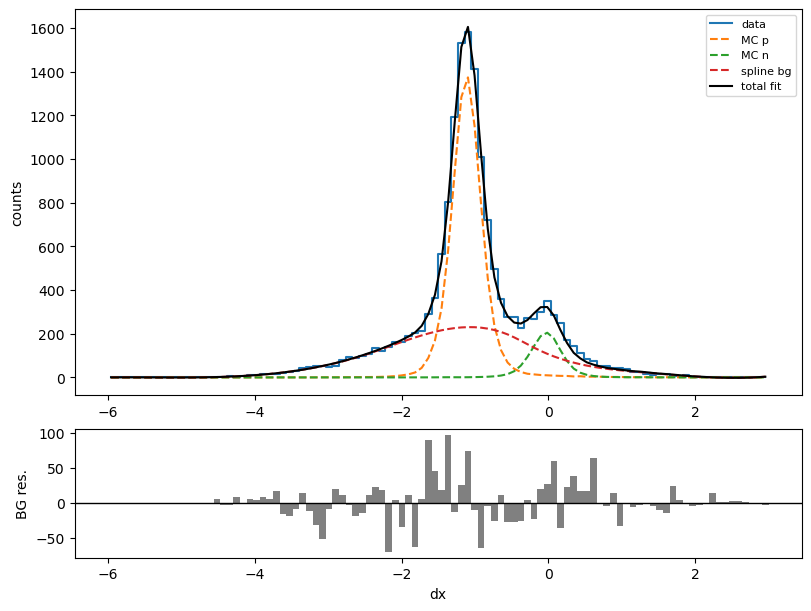

In [117]:
import matplotlib.gridspec as gridspec

# 1) Build residual BG & spline
resid = data_counts - (p_s*tp + n_s*tn)
mask_bg = ((centers < -2.2)
         | ((centers > -0.7) & (centers < -0.1))
         | (centers > +0.6))
x_bg, y_bg = centers[mask_bg], resid[mask_bg]
s_val = len(x_bg) * np.var(y_bg) * 0.02
bs    = UnivariateSpline(x_bg, y_bg, s=s_val)
bg_fit = bs(centers)
model  = p_s*tp + n_s*tn + bg_fit

# 2) Plot with two rows, constrained layout
fig = plt.figure(figsize=(8,6), constrained_layout=True)
gs  = fig.add_gridspec(2, 1, height_ratios=[3,1])

ax0 = fig.add_subplot(gs[0])
ax0.step(centers, data_counts, where='mid', color='C0', label='data')
ax0.plot(centers, p_s*tp, '--', color='C1', label='MC p')
ax0.plot(centers, n_s*tn, '--', color='C2', label='MC n')
ax0.plot(centers, bg_fit, '--', color='C3', label='spline bg')
ax0.plot(centers, model,  '-',  color='k', label='total fit')
ax0.legend(fontsize=8)
ax0.set_ylabel("counts")

ax1 = fig.add_subplot(gs[1], sharex=ax0)
resid_bg = bg_scale*bg_counts - bg_fit
ax1.bar(centers, resid_bg, width, color='gray')
ax1.axhline(0, color='k', lw=1)
ax1.set_xlabel("dx")
ax1.set_ylabel("BG res.")

plt.show()

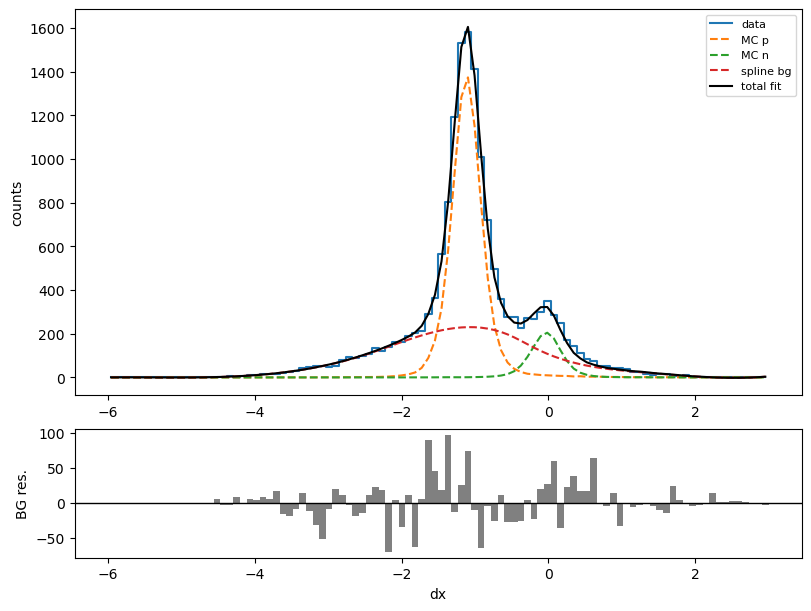

In [133]:
fig = plt.figure(figsize=(8,6), constrained_layout=True)
gs  = fig.add_gridspec(2, 1, height_ratios=[3,1])

ax0 = fig.add_subplot(gs[0])
ax0.step(centers, data_counts, where='mid', color='C0', label='data')
ax0.plot(centers, p_s*tp, '--', color='C1', label='MC p')
ax0.plot(centers, n_s*tn, '--', color='C2', label='MC n')
ax0.plot(centers, bg_fit, '--', color='C3', label='spline bg')
ax0.plot(centers, model,  '-',  color='k', label='total fit')
ax0.legend(fontsize=8)
ax0.set_ylabel("counts")

ax1 = fig.add_subplot(gs[1], sharex=ax0)
resid_bg = bg_scale*bg_counts - bg_fit
ax1.bar(centers, resid_bg, width, color='gray')
ax1.axhline(0, color='k', lw=1)
ax1.set_xlabel("dx")
ax1.set_ylabel("BG res.")

plt.show()

In [136]:
# after you’ve built `bs = UnivariateSpline(x_bg,y_bg,s=s_val)`
t = bs.get_knots()    # knot positions (1D array)
c = bs.get_coeffs()   # B-spline coefficients
try:
    k = bs.k
except AttributeError:
    k = len(t) - len(c) - 1
    
# save them to disk

np.save("GEN4b_bg_spline_knots.npy",   t)
np.save("GEN4b_bg_spline_coeffs.npy",  c)
np.save("GEN4b_bg_spline_degree.npy",  np.array([k]))